# Backtesting on LGBMClassifier

In [1]:
import os
import json
import numpy as np
import pandas as pd
import vectorbt as vbt
from lightgbm import LGBMClassifier
from tqdm import tqdm

from strategies.general import BaseStrategy
from strategies.TSMixer_strategy import TSMixerStrategy


import numpy as np
import pandas as pd
import vectorbt as vbt


from backtesting_utils import (
    run_ml_weekly_strategy, weights_stat_report, plot_nist_stock_in_profile, 
    plot_stock_weights_in_profile, plot_hist_stock_weights, plot_hist_returns, 
    extended_stats, rolling_sharp, rolling_valatility,
    save_portfolio_stats, load_backtesting_dataset, plot_portfolio_value, plot_dayly_return, plot_allocation
    )



⚙️ Using device: mps


In [2]:
backtesting: str = "reports/strategies/TSMixer.csv"

In [3]:
df = load_backtesting_dataset()


In [4]:
strategy = TSMixerStrategy(df, lookback=32, epochs=5)

✅ Загружено 15,143 строк по 45 тикерам.


In [5]:
pf, target_weights = run_ml_weekly_strategy(df, strategy, do_paralel=False)

Compute for 2019-12-09 00:00:00

[TSMixer] Обучение модели на 2554 строк (до 2019-12-09)
Epoch 1/5 | Loss: 2516414.7447
Epoch 2/5 | Loss: 1459.1551
Epoch 3/5 | Loss: 1459.9242
Epoch 4/5 | Loss: 1702.4966
Epoch 5/5 | Loss: 1590.1550
Compute for 2019-12-16 00:00:00

[TSMixer] Обучение модели на 2599 строк (до 2019-12-16)
Epoch 1/5 | Loss: 1332749.8268
Epoch 2/5 | Loss: 2396.3975
Epoch 3/5 | Loss: 1542.0275
Epoch 4/5 | Loss: 1377.4659
Epoch 5/5 | Loss: 2054.8846
Compute for 2019-12-23 00:00:00

[TSMixer] Обучение модели на 2644 строк (до 2019-12-23)
Epoch 1/5 | Loss: 1863977.1905
Epoch 2/5 | Loss: 2082.1917
Epoch 3/5 | Loss: 2038.0425
Epoch 4/5 | Loss: 3079.4071
Epoch 5/5 | Loss: 3326.7483
Compute for 2019-12-30 00:00:00

[TSMixer] Обучение модели на 2689 строк (до 2019-12-30)
Epoch 1/5 | Loss: 1649352.5328
Epoch 2/5 | Loss: 3031.9749
Epoch 3/5 | Loss: 2048.2816
Epoch 4/5 | Loss: 1956.6485
Epoch 5/5 | Loss: 2449.3000
Compute for 2020-01-06 00:00:00

[TSMixer] Обучение модели на 2716 строк

/Users/beilakaliev/projects/trading/trading-ml-modeling/modeling/backtesting_utils.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.037037037037037035' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  target_weights.loc[dt, t] = w
/Users/beilakaliev/projects/trading/trading-ml-modeling/modeling/backtesting_utils.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.037037037037037035' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  target_weights.loc[dt, t] = w
/Users/beilakaliev/projects/trading/trading-ml-modeling/modeling/backtesting_utils.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.037037037037037035' has dtype incompatible with int64, plea

In [6]:
# Сколько акций держим в среднем (не нулевых)
weights_stat_report(target_weights)


Среднее количество акций в портфеле: 33.93032514930325
Минимальное количество акций в портфеле: 0
Минимальное ненулевое количество акций в портфеле: 27
Максимальное количество акций в портфеле: 45


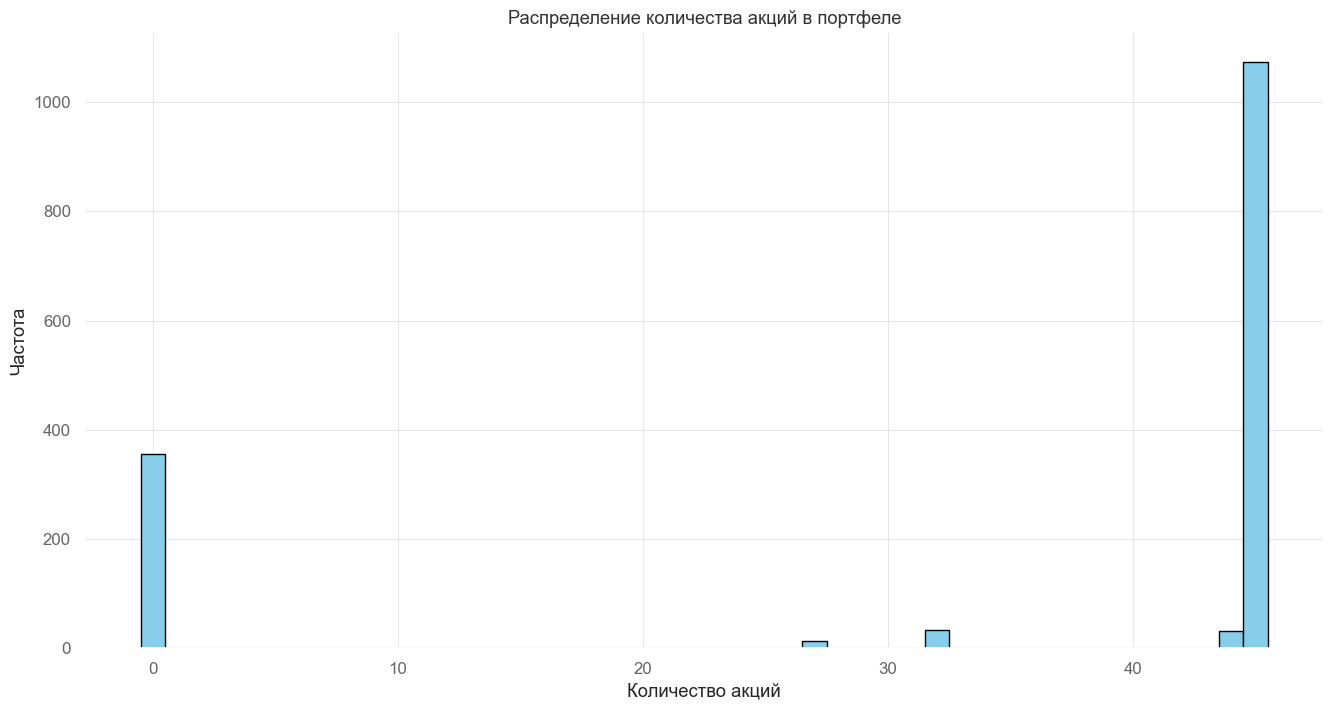

In [7]:
plot_nist_stock_in_profile(target_weights)

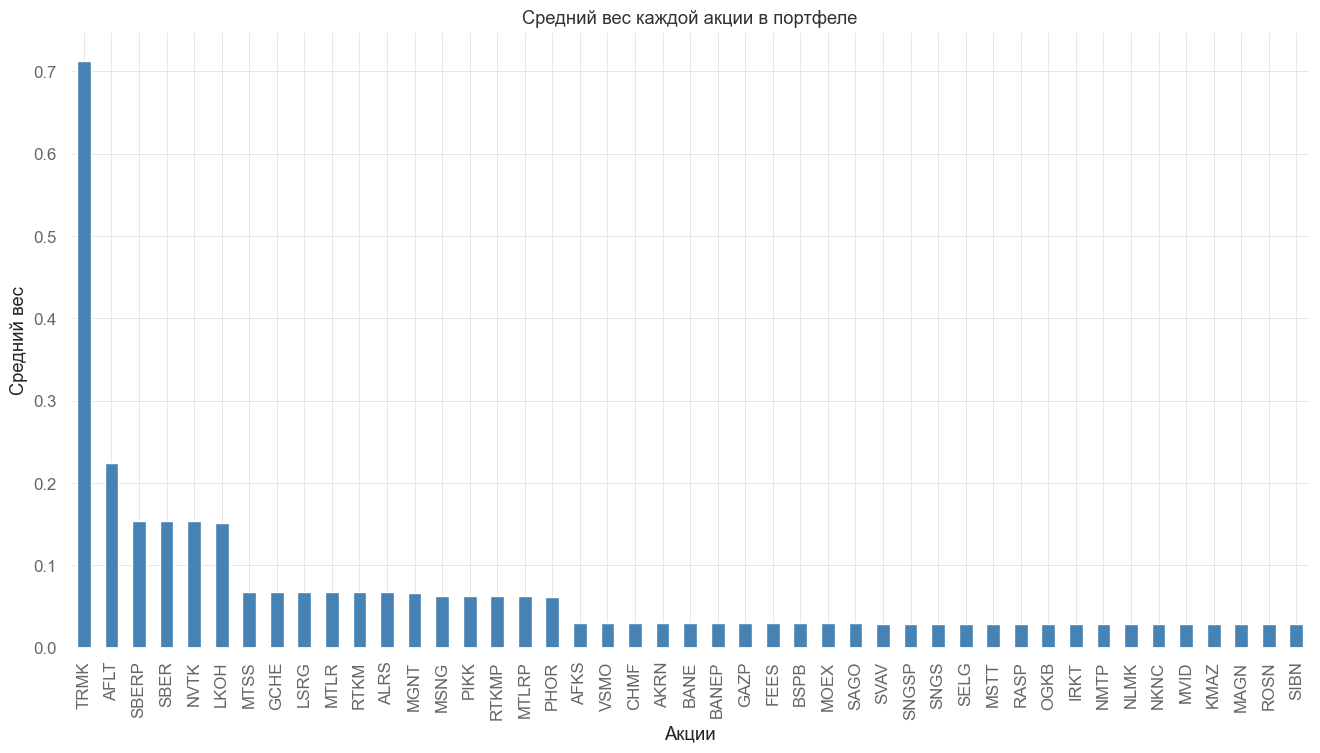

In [8]:
plot_stock_weights_in_profile(target_weights)

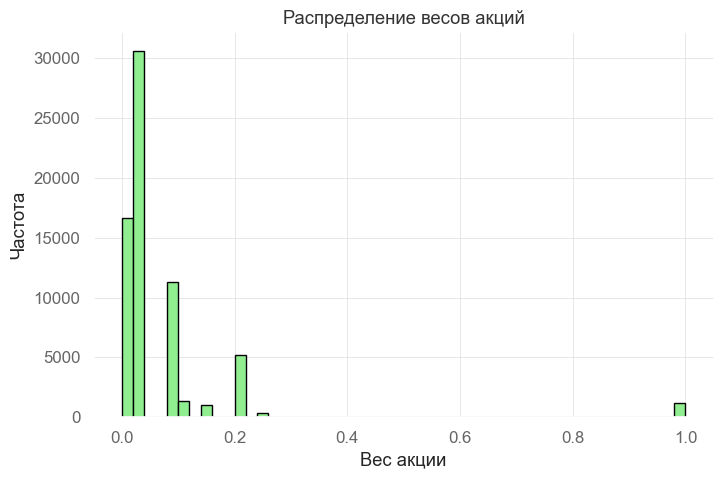

In [9]:
plot_hist_stock_weights(target_weights)

In [10]:
vbt.settings['plotting']['layout']['width'] = 1600
vbt.settings['plotting']['layout']['height'] = 1000


<Axes: xlabel='Date'>

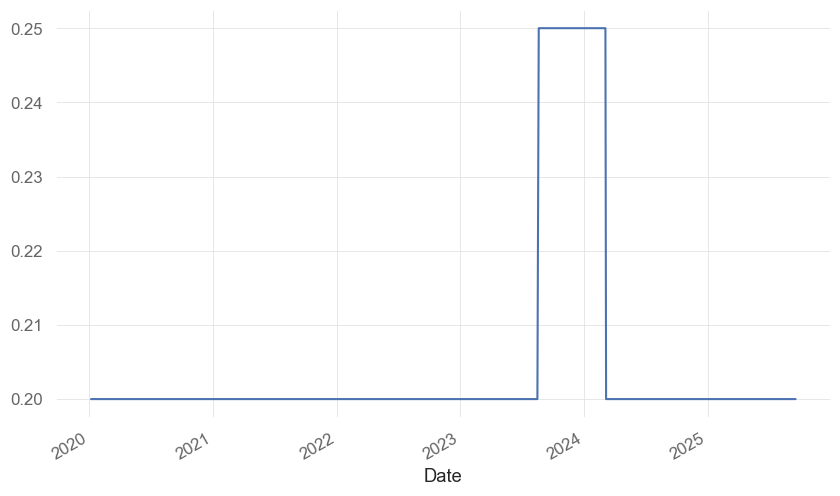

In [11]:
target_weights[target_weights.index > '2020-01-01'].SBER.plot()

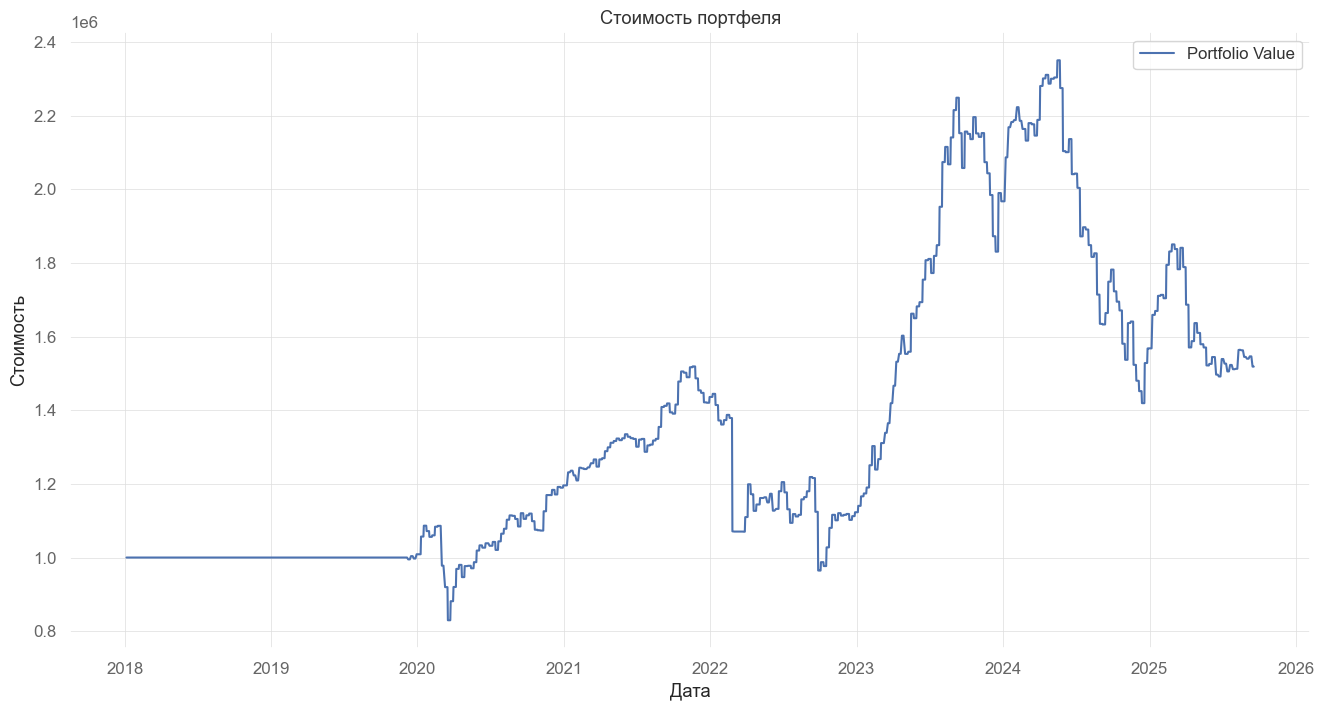

In [12]:
plot_portfolio_value(pf)

In [13]:
pf.plot()


/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning: Subplot 'orders' does not support grouped data
  warnings.warn(warning_message)
/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning: Subplot 'trade_pnl' does not support grouped data
  warnings.warn(warning_message)


FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#7f7f7f'},
              'name': 'Benchmark',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'bd251065-305e-4499-b26b-94d2e26ced36',
              'x': array([datetime.datetime(2018, 1, 5, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0),
                          datetime.datetime(2018, 1, 18, 0, 0), ...,
                          datetime.datetime(2025, 9, 15, 0, 0),
                          datetime.datetime(2025, 9, 17, 0, 0),
                          datetime.datetime(2025, 9, 18, 0, 0)], shape=(1507,), dtype=object),
              'xaxis': 'x',
              'y': array([1.        , 1.00175982, 1.00175982, ..., 1.573177  , 1.5709616 ,
                          1.57127274], shape=(1507,)),
              'yaxis': 'y'},
             {'hoverinfo': 'skip',
              'legendgroup': '1',
              'line': {'color': 'rgba(0, 0, 0, 0)', '

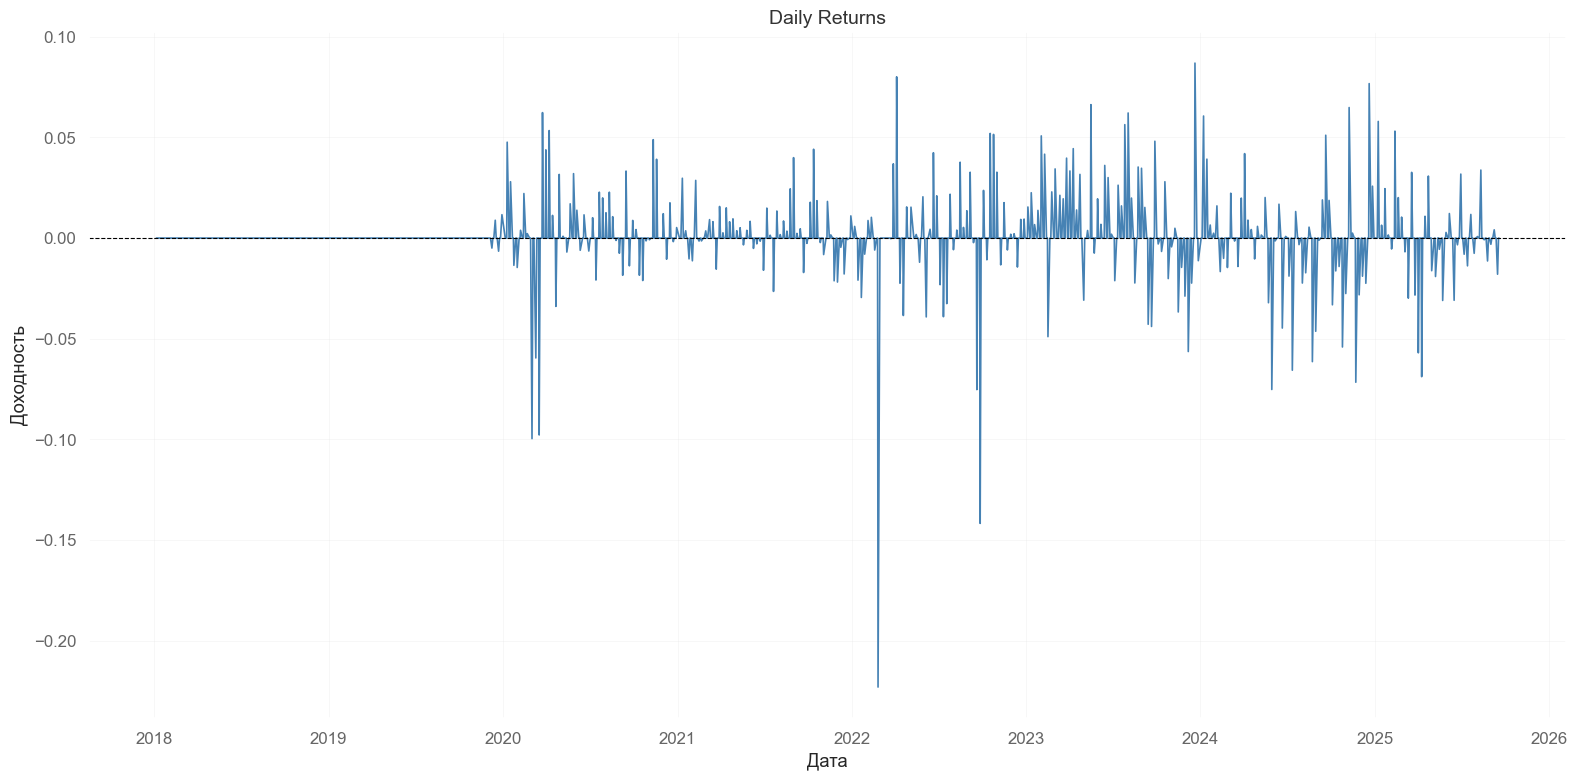

In [14]:
plot_dayly_return(pf)

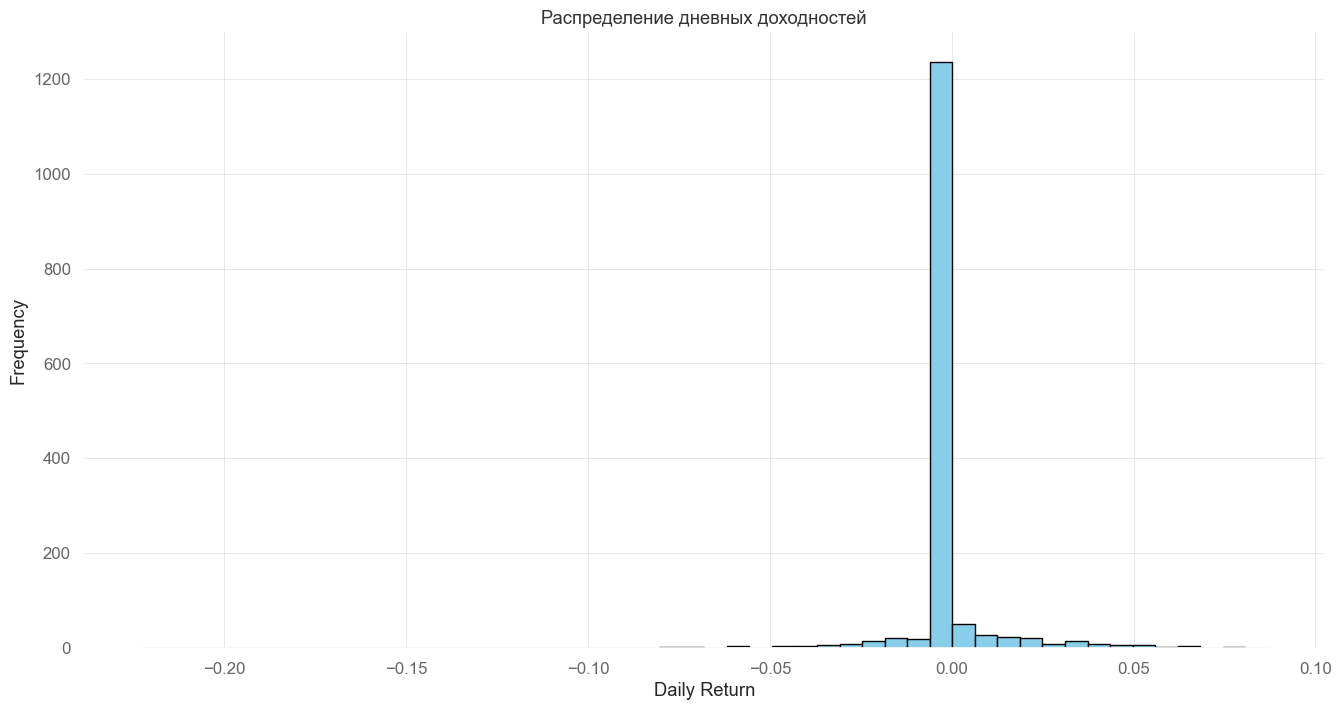

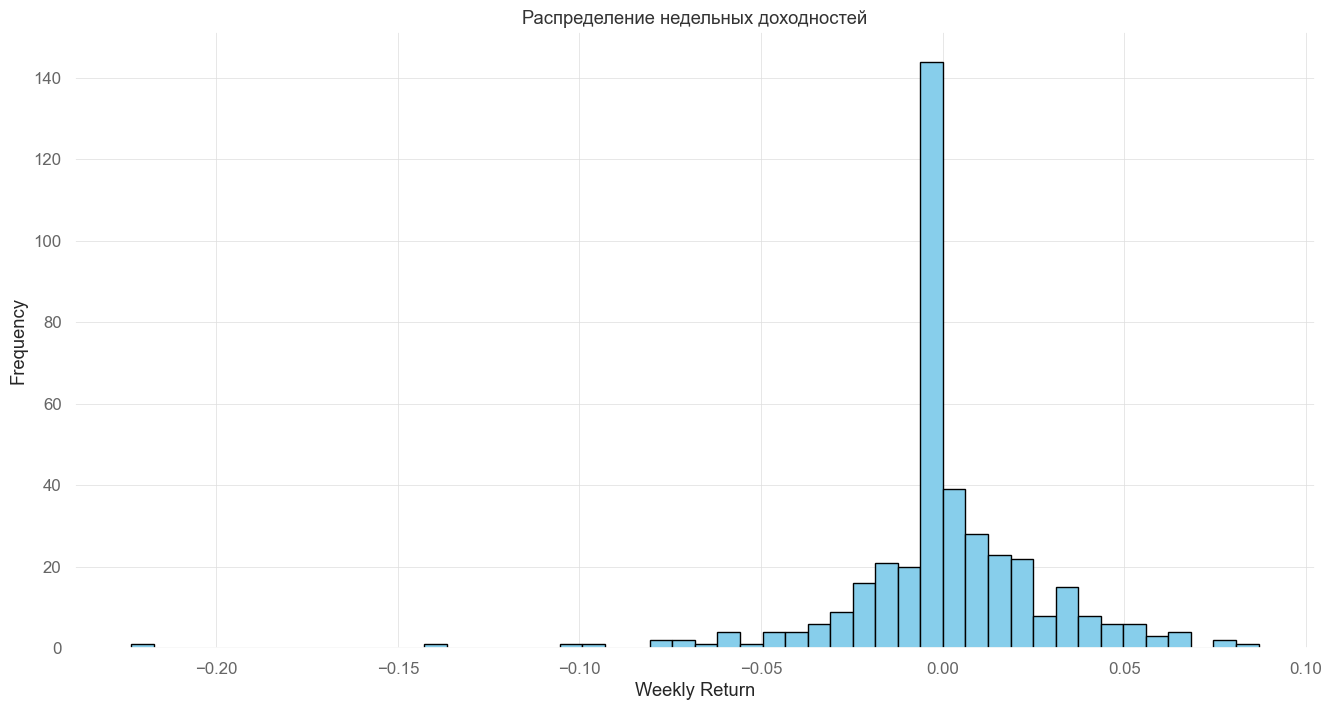

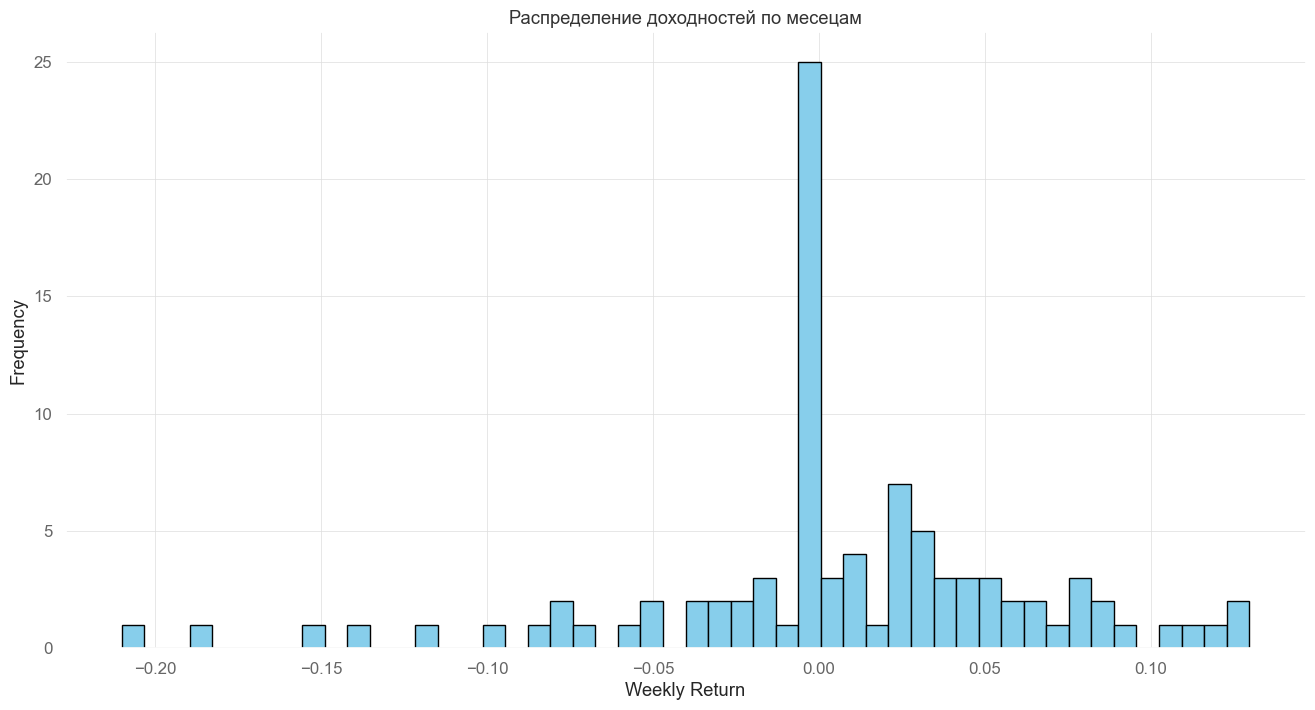

In [15]:
plot_hist_returns(pf)

In [16]:
pf.drawdowns.plot(title="Drawdowns")


FigureWidget({
    'data': [{'line': {'color': '#1f77b4'},
              'name': 'group',
              'showlegend': True,
              'type': 'scatter',
              'uid': '8c590511-bcca-42fb-a05a-983cdee1faba',
              'x': array([datetime.datetime(2018, 1, 5, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0),
                          datetime.datetime(2018, 1, 18, 0, 0), ...,
                          datetime.datetime(2025, 9, 15, 0, 0),
                          datetime.datetime(2025, 9, 17, 0, 0),
                          datetime.datetime(2025, 9, 18, 0, 0)], shape=(1507,), dtype=object),
              'y': array([1000000.        , 1000000.        , 1000000.        , ...,
                          1518488.83184104, 1518448.00375087, 1518448.00375087], shape=(1507,))},
             {'customdata': array([[ 2],
                                   [ 4],
                                   [18],
                                   [28],
                

In [17]:
pf.plot(subplots=['orders', 'value', 'drawdowns'], title="Portfolio Overview")


/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'orders' does not support grouped data



FigureWidget({
    'data': [{'hoverinfo': 'skip',
              'legendgroup': '0',
              'line': {'color': 'rgba(0, 0, 0, 0)', 'width': 0},
              'opacity': 0,
              'showlegend': False,
              'type': 'scatter',
              'uid': '0732ae42-e11c-4f44-b1d1-6e18a3d5ed45',
              'x': array([datetime.datetime(2018, 1, 5, 0, 0),
                          datetime.datetime(2018, 1, 15, 0, 0),
                          datetime.datetime(2018, 1, 18, 0, 0), ...,
                          datetime.datetime(2025, 9, 15, 0, 0),
                          datetime.datetime(2025, 9, 17, 0, 0),
                          datetime.datetime(2025, 9, 18, 0, 0)], shape=(1507,), dtype=object),
              'xaxis': 'x',
              'y': array([1000000., 1000000., 1000000., ..., 1000000., 1000000., 1000000.],
                         shape=(1507,)),
              'yaxis': 'y'},
             {'connectgaps': False,
              'fill': 'tonexty',
              'f

In [18]:
fig = plot_allocation(pf, target_weights)


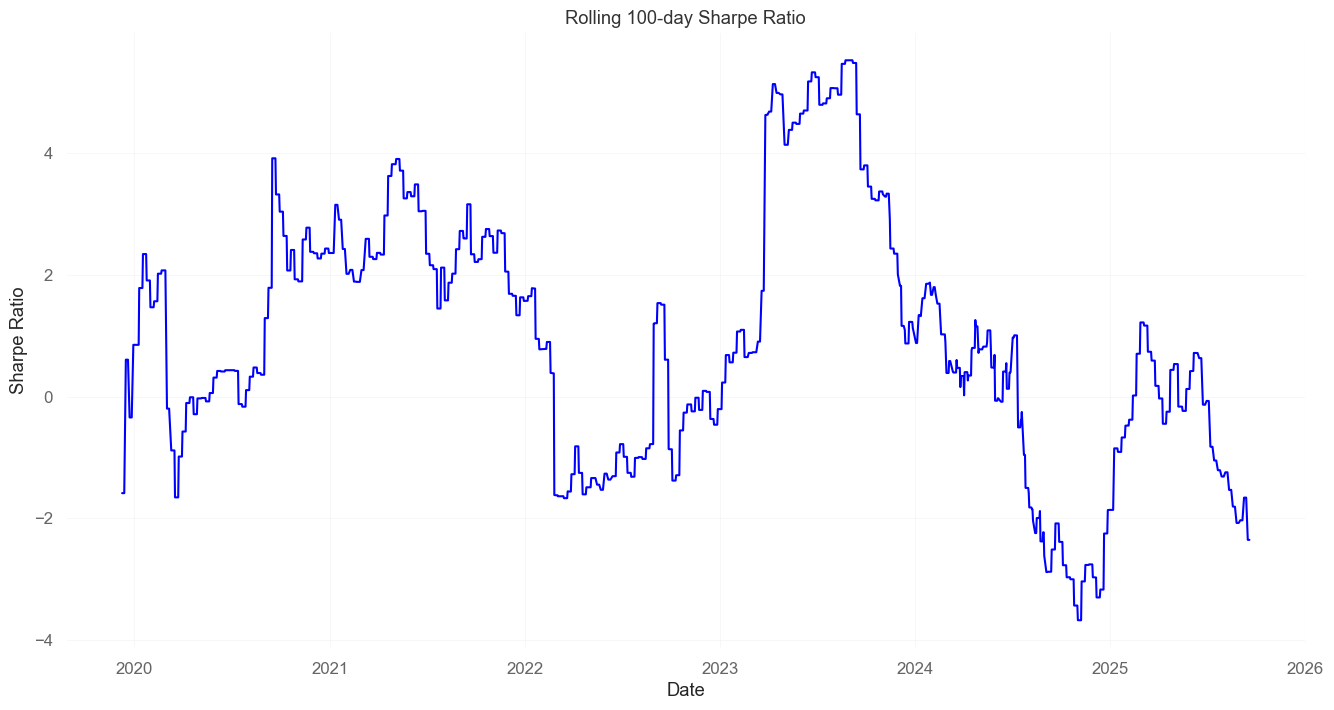

In [19]:
rolling_sharp(pf)

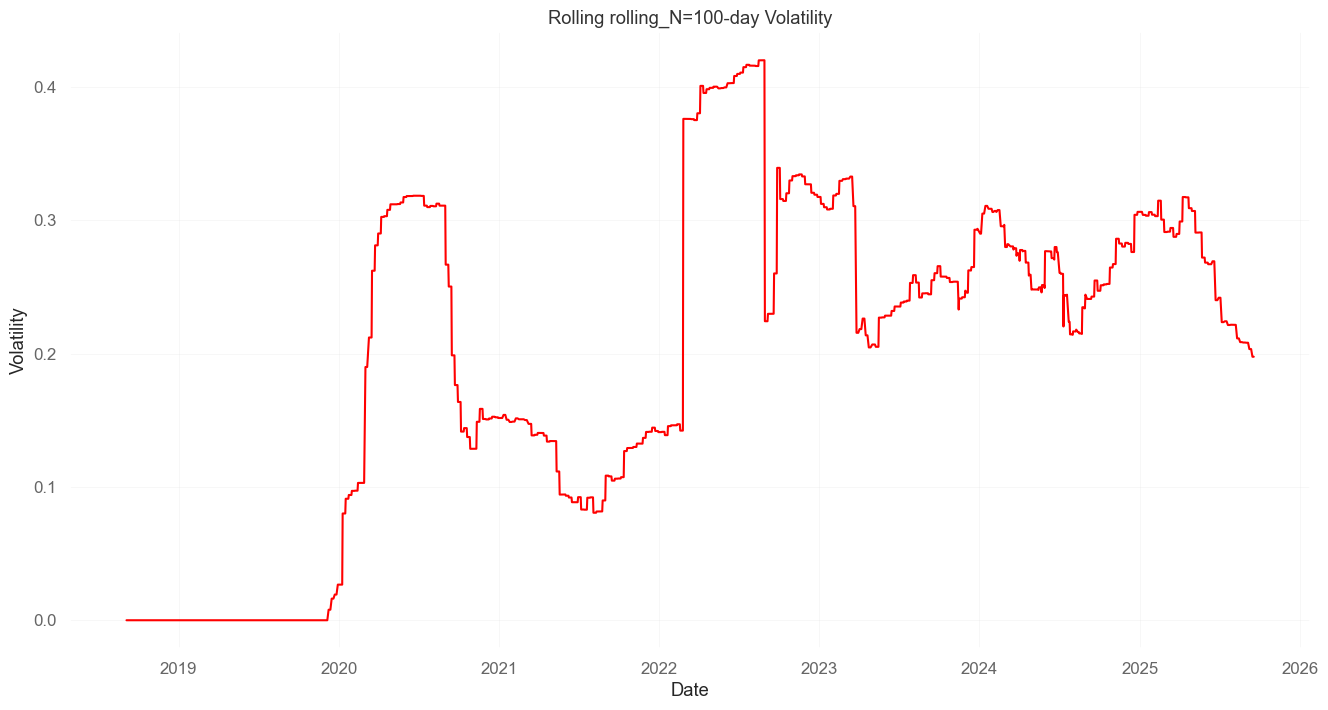

In [20]:
rolling_valatility(pf)

/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning:

divide by zero encountered in vecdot

/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning:

overflow encountered in vecdot

/Users/beilakaliev/Library/Caches/pypoetry/virtualenvs/ml-modeling-TB8BmMSm-py3.12/lib/python3.12/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning:

invalid value encountered in vecdot



<Axes: xlabel='return', ylabel='Count'>

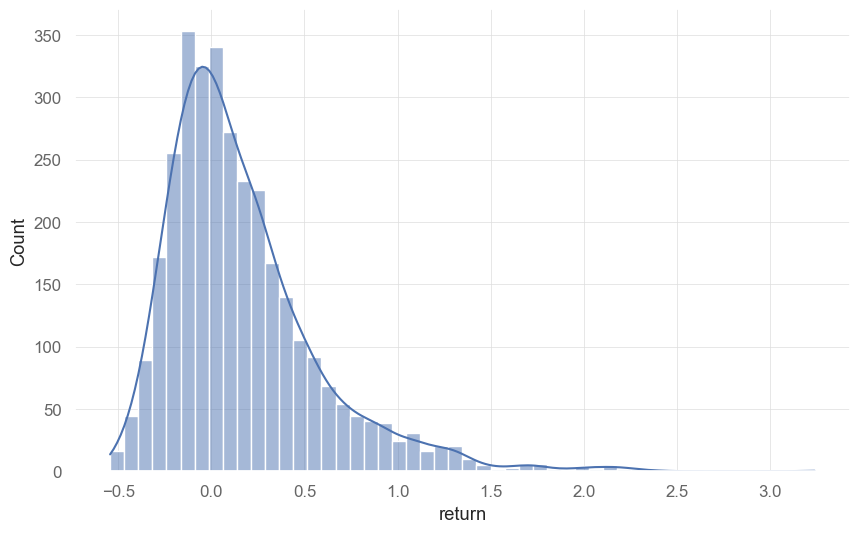

In [21]:
import seaborn as sns
sns.histplot(pf.trades.records['return'], bins=50, kde=True)


In [22]:
extended_portfolio_stats = extended_stats(pf)
print(extended_portfolio_stats)

Start                                 2018-01-05 00:00:00
End                                   2025-09-18 00:00:00
Period                                 1507 days 00:00:00
Start Value                                     1000000.0
End Value                                  1518448.003751
Total Return [%]                                  51.8448
Benchmark Return [%]                            57.127274
Max Gross Exposure [%]                              100.0
Total Fees Paid                              60318.453242
Max Drawdown [%]                                 39.62048
Max Drawdown Duration                   279 days 00:00:00
Total Trades                                         3265
Total Closed Trades                                  3237
Total Open Trades                                      28
Open Trade PnL                                        0.0
Win Rate [%]                                    58.943466
Best Trade [%]                                 324.007212
Worst Trade [%

In [23]:
save_portfolio_stats(extended_portfolio_stats, file_path=backtesting)

✅ Статистика сохранена в CSV: reports/strategies/TSMixer.csv
